# Demo for the *sheaves_on_posets* SageMath package

This package can be used to calculate the cohomology modules of *finite locally free sheaves of modules over a commutative ring* on finite posets. As the category of finite posets is equivalent to the category of finite T0 topological spaces, this provides a way of calculating the sheaf cohomology for such spaces. 

Moreover, we can determine the *dualizing complex* of a finite poset with respect to a commutative ring. 

In [1]:
from sheaves_on_posets import LocFreeSheaf

As an example, we consider a five-point model of the unit disk 

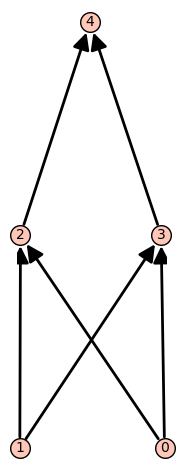

In [2]:
D = Poset({0:[2,3,4], 1:[2, 3, 4], 2:[4], 3:[4], 4:[]})
D.show()

A finite locally free sheaf of modules (over a fixed commutative ring) on a finite poset is just a functor from the poset (viewed as a category in the usual way) to the category of free modules of finite rank. So to define a sheaf on ``D`` we need to specify the rank of the stalk at every point and a matrix for every cover relation (that is, every arrow in the diagram above).

In [3]:
stalk_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:1
}

# instead of a matrix, we can set 0 for the zero map or 1 for the identity matrix
restriction_dict = {
    (0, 2):0,
    (0, 3):0,
    (1, 2):0,
    (1, 3):0,
    (2, 4):0,
    (3, 4):0
}

# The base ring can be specified with the key-word argument base_ring, it dedfaults to the ring of integers
F = LocFreeSheaf(stalk_dict, restriction_dict, domain_poset = D)
F


Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements

We can access the stalks and restriction maps of ``F``

In [4]:
F.stalk(0)

Rank-0 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 0 over the Integer Ring

In [5]:
F.stalk(4)

Rank-1 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 4 over the Integer Ring

In [6]:
F.restriction(2, 4)

Generic morphism:
  From: Rank-0 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 2 over the Integer Ring
  To:   Rank-1 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 4 over the Integer Ring

Lets build the same sheaf in another way. We can also start with a constant rank-1 sheaf on the singleton and extend by zero. 

In [7]:
# By not specifying the domain poset, the domain poset will be build internally. 
C = LocFreeSheaf({0:1}, {})

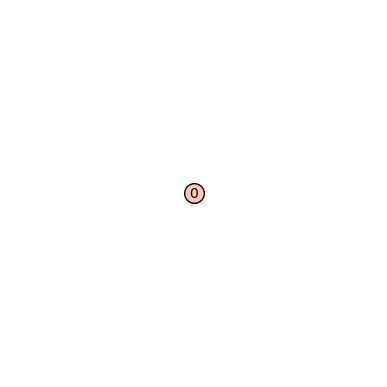

In [8]:
C.domain_poset().show()

In [9]:
inclusion_map = Hom(C.domain_poset(), D)(lambda point: {0:4}[point])
F2 = C.extend_by_zero(inclusion_map)

The sheaf cohomology can be calculated using the *Godement resolution*. The cochain complex obtained after taking global sections of this resolution can be accessed by ``godement_cochain_complex``. 

In [10]:
F.godement_cochain_complex()

Chain complex with at most 3 nonzero terms over Integer Ring

In [11]:
ascii_art(F.godement_cochain_complex())

            [-1  0  1  0]       [1]      
            [-1  0  0  1]       [1]      
            [ 0 -1  1  0]       [1]      
            [ 0 -1  0  1]       [1]      
 0 <-- C_2 <-------------- C_1 <---- C_0 <-- 0 

The sheaf cohomology of *(D, F)* is now simply the cohomology of this complex. 

In [12]:
F.cohomology()

{0: 0, 1: 0, 2: Z}

Lets calculate the sheaf cohomology of the constant sheaf on a random poset

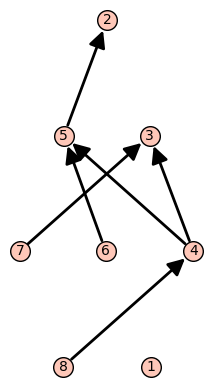

{0: Z x Z, 1: 0, 2: 0, 3: 0}

In [15]:
set_random_seed(2020)

from sheaves_on_posets import ConstantSheaf

npoints = 8
p = posets.RandomPoset(npoints, .3)
p.show()
s = ConstantSheaf(p)
s.cohomology()

## Dualizing Complex

In [16]:
from sheaves_on_posets import dualizing_complex

Given a poset and a commutative ring, we can determine the dualizing complex.

In [17]:
com = dualizing_complex(D, base_ring = ZZ)
com

(Cochain) Complex of Locally Free Sheaves of Modules over Integer Ring on Finite poset containing 5 elements with at most 3 nonzero terms

In [18]:
# non-zero sheaves are possibly here
print(com.below_bound(), com.above_bound())

(-2, 0)


In [19]:
# a sheaf at a certain degree can be accessed by square brackets
com[-2]

Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements

In [20]:
# we can also access the differentials

# for example, the differential that goes from -2 to -1
com.differential(-2)

Generic Morphism of Locally Free Sheaves of Modules over Integer Ring on Finite poset containing 5 elements
 From: Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements
 To: Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements

In [21]:
# this is a morphism of sheaves, it's components can be accessed using square brackets
com.differential(-2)[2]

Generic morphism:
  From: Rank-4 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 2 over the Integer Ring
  To:   Rank-6 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 2 over the Integer Ring

In [22]:
com.differential(-1)[3].matrix()

[1 0 1 0 0 0]
[0 1 0 1 1 1]

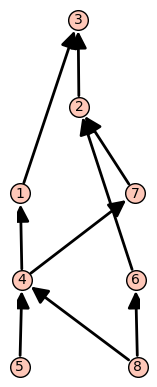

(Cochain) Complex of Locally Free Sheaves of Modules over Integer Ring on Finite poset containing 8 elements with at most 5 nonzero terms

In [23]:
# Lets determine the dualizing complex of some random poset
npoints = 8
p = posets.RandomPoset(npoints, .4)
p.show()
d = dualizing_complex(p)
d

### other things
An overview of some other things

In [24]:
# Global sections of the sheaf
F.global_sections()

Rank-0 free module Global Sections of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements over the Integer Ring

In [25]:
# Sections over an upward closed subset of F (upward closed subsets correspond to open sets
#    under the equivalence between finite posets and finite T0 spaces)
F.sections([2, 3, 4])

Rank-0 free module Sections of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements on [2, 3, 4] over the Integer Ring

In [26]:
# The Euler Characteristic
F.euler_characteristic()

1

In [27]:
# The Godement sheaf, which comes together with a map into it
epsilon, G0 = F.godement_sheaf()

In [28]:
# this map should be injective
epsilon.is_injective()

True

In [29]:
# godement sheaves are flaque, so the cohomology should be zero above degree 0
G0.cohomology()

{0: Z, 1: 0, 2: 0}

In [30]:
# make the restriction sheaf to an upward closed subset
F.restrict_to([2, 4])

Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 2 elements